In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('C:/Users/SHREYA SAHA/Downloads/Crop Production data.csv')
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [6]:
#check if there is missing values
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

<Axes: >

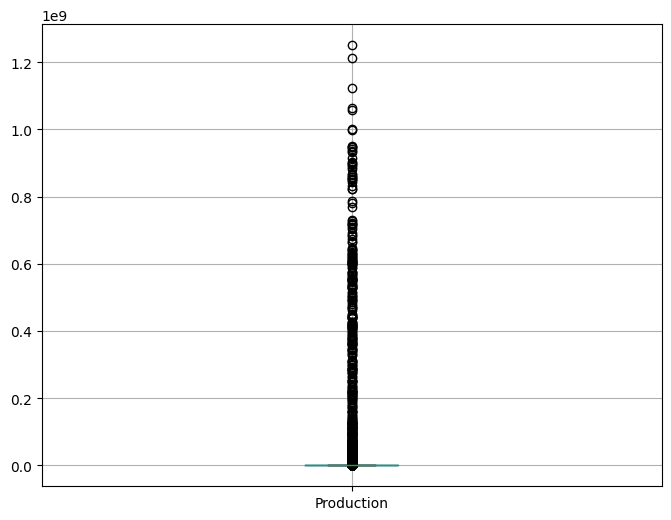

In [7]:
#Handle outliers
plt.figure(figsize=(8,6))
df.boxplot(column=['Production'])

In [8]:
#Display few rows 
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [9]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


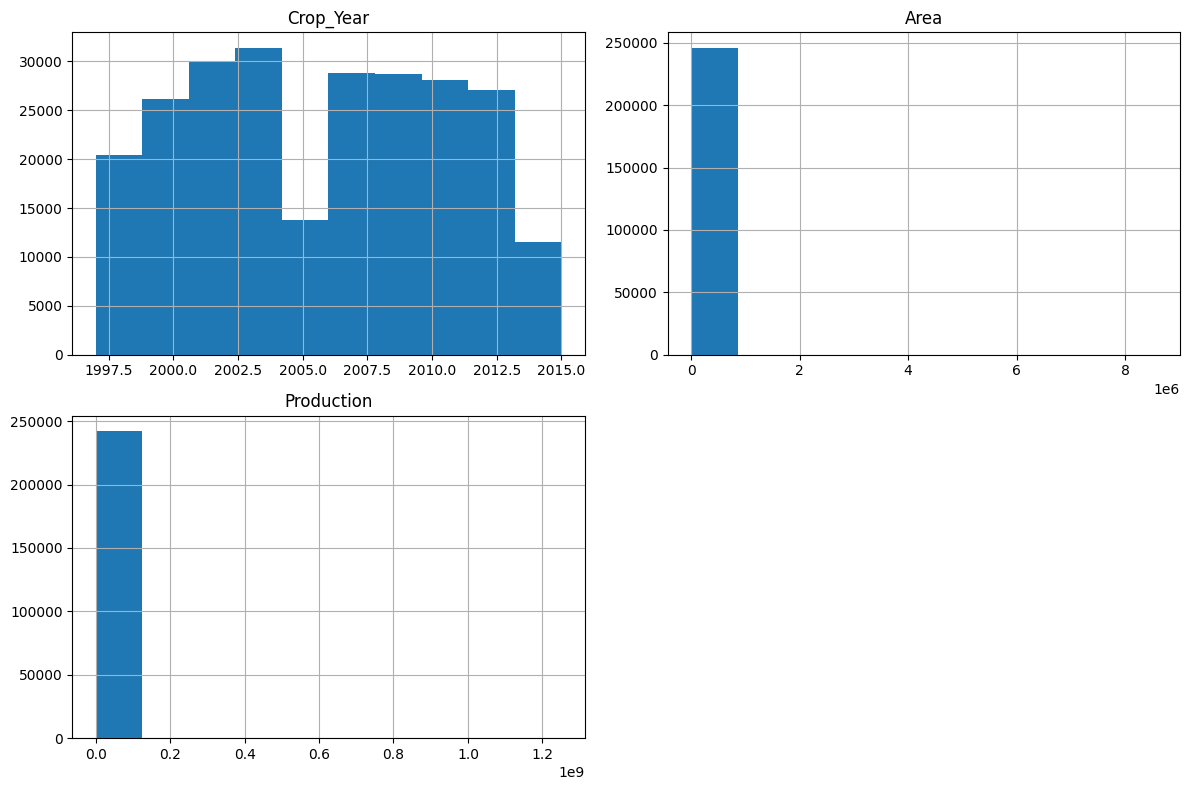

In [11]:
#Histogram
df.hist(figsize=(12,8))
plt.tight_layout()

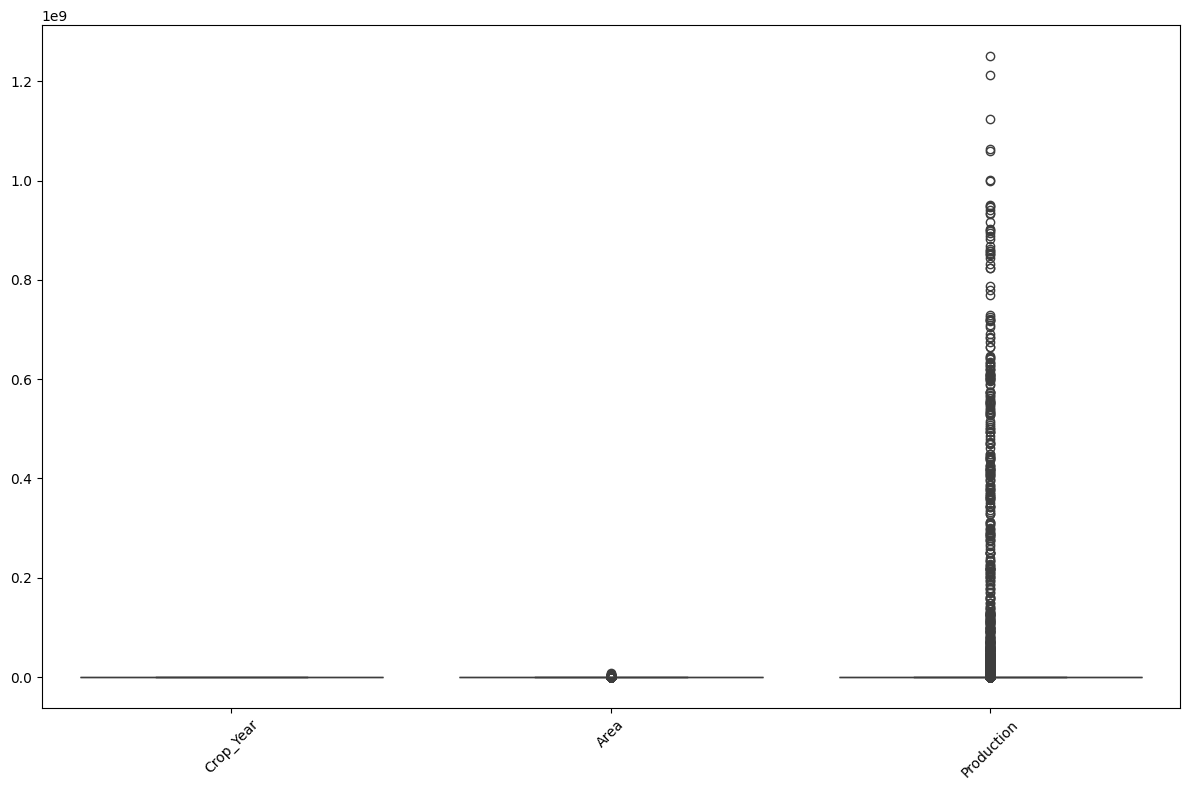

In [12]:
#Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.tight_layout()

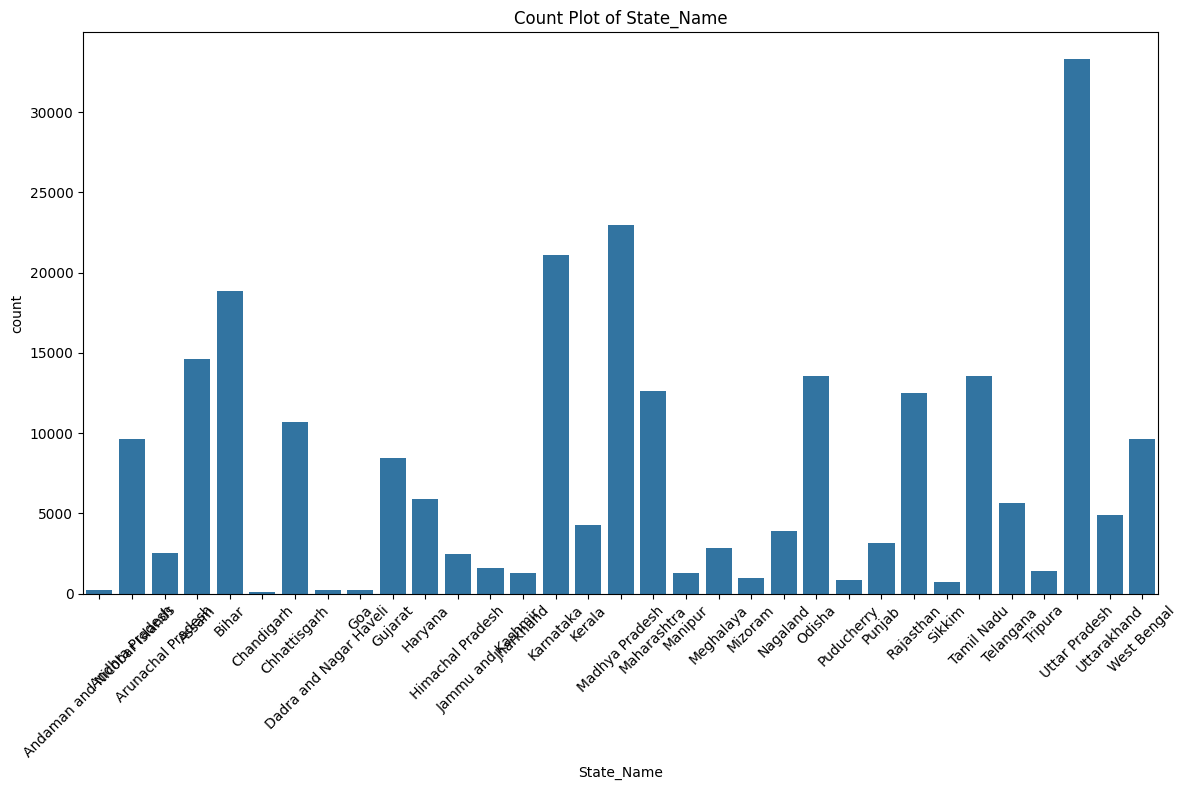

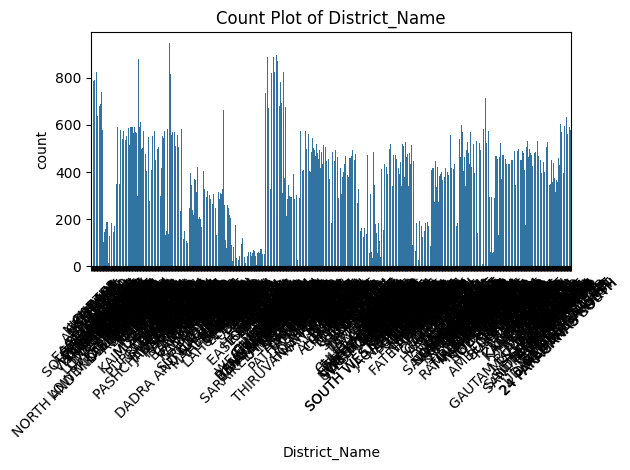

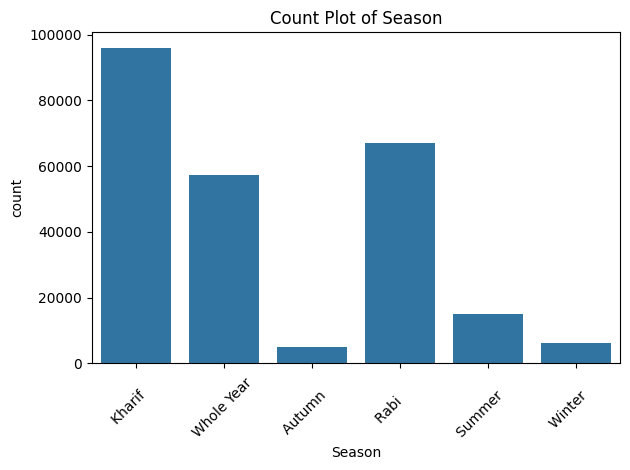

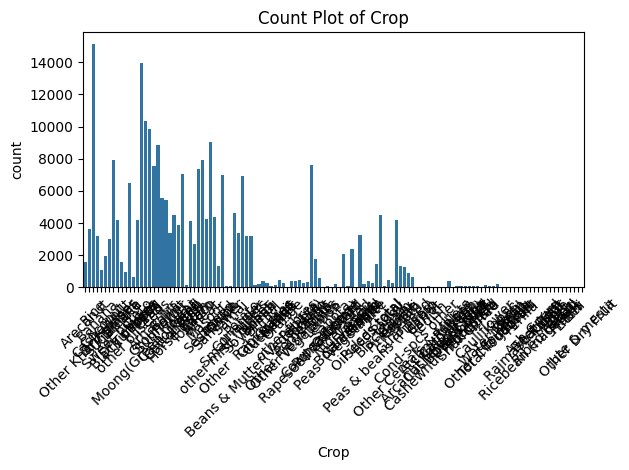

In [14]:
plt.figure(figsize=(12,8))
for column in df.select_dtypes(include='object').columns:
    sns.countplot(x=column,data=df)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {column}')
    plt.tight_layout()
    plt.show()

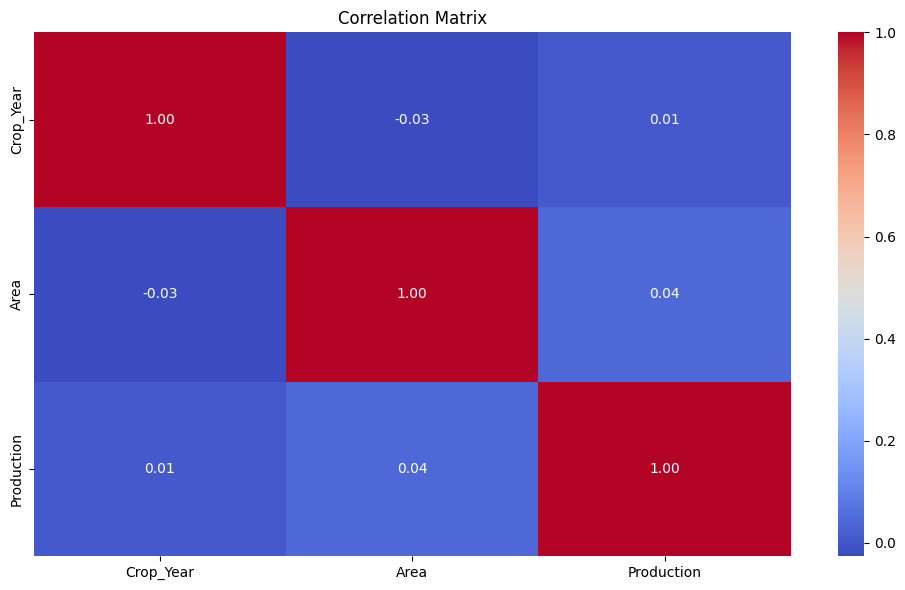

In [18]:
numeric_columns=df.select_dtypes(include=['number']).columns
cor_matrix=df[numeric_columns].corr()

plt.figure(figsize=(10,6))
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [22]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(','').str.replace(')','')
df.columns

Index(['state_name', 'district_name', 'crop_year', 'season', 'crop', 'area',
       'production'],
      dtype='object')

C:\Users\SHREYA SAHA\AppData\Local\Temp\ipykernel_17148\4192197001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_prod.index,y=total_prod.values,palette='Set1')


Text(0, 0.5, 'Production')

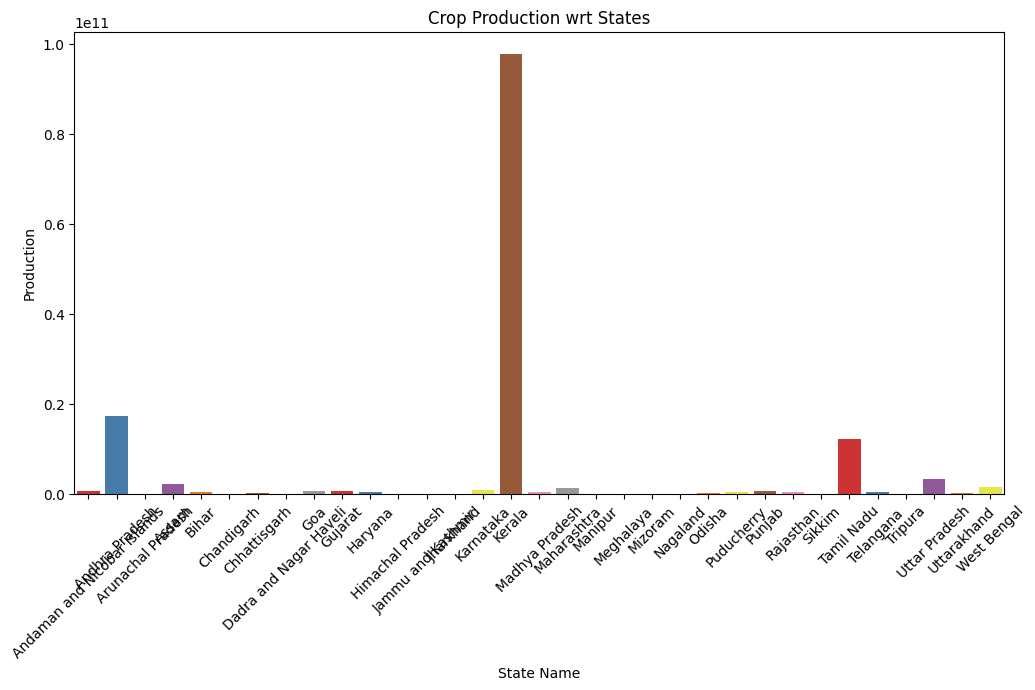

In [25]:
total_prod=df.groupby('state_name')['production'].sum()
plt.figure(figsize=(12,6))
sns.barplot(x=total_prod.index,y=total_prod.values,palette='Set1')
plt.title('Crop Production wrt States')
plt.xlabel('State Name')
plt.xticks(rotation=45)
plt.ylabel('Production')

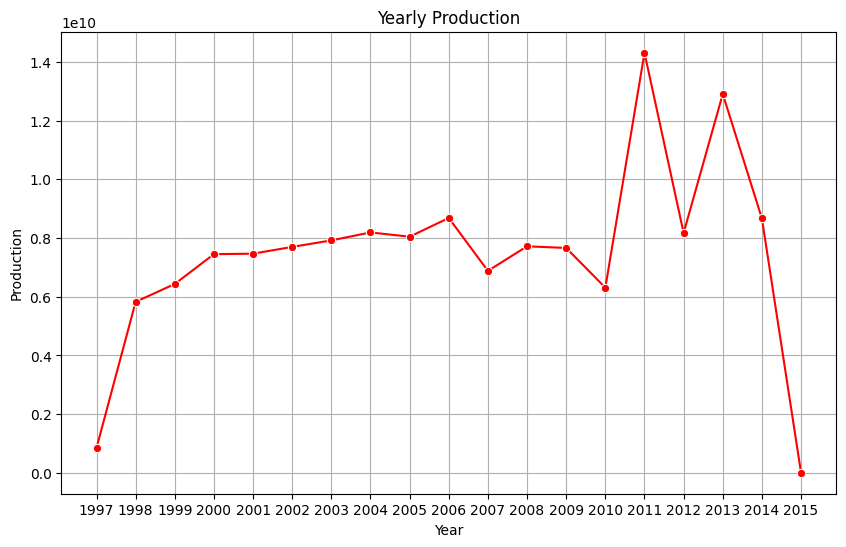

In [28]:
yearly_prod=df.groupby('crop_year')['production'].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_prod.index,y=yearly_prod.values,marker='o',color='r')
plt.title('Yearly Production')
plt.xlabel('Year')
plt.ylabel('Production')
plt.xticks(yearly_prod.index)
plt.grid(True)